In [1]:
import cv2
 

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabel=[]
file_name='assets\labels.txt'
with open(file_name,'rt') as fpt:
    classLabel=fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabel)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabel))
print(classLabel[72])

80
refrigerator


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)     #mobilenet=>[-1,1]
model.setInputSwapRB(True)

<dnn_Model 00000206CEAA1670>

read an image

In [9]:
img=cv2.imread('assets\car2.jpg')

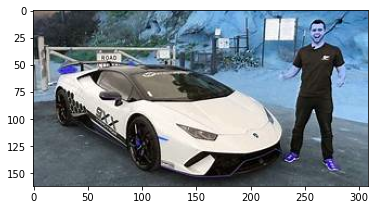

In [10]:
plt.imshow(img)    #bgr

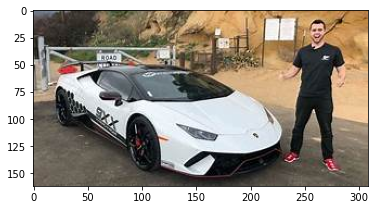

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[[1]
 [3]]


In [14]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),1)
    cv2.putText(img,classLabel[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)
    #cv2.putText(img,classLabel[ClassInd-1],(boxes[1]+40,font))

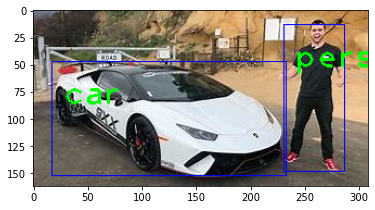

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


# Video

In [16]:
cap=cv2.VideoCapture('assets\WhatsApp Video 2021-06-12 at 09.55.26.mp4')
#check if the video oened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can not open video")
    
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                
                cv2.putText(frame,classLabel[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)
    
    cv2.imshow('Object detection',frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [62]]
[[ 1]
 [ 1]
 [ 1]
 [62]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[28]]
()
[[72]
 [85]]
[[72]]
[[72]]
[[72]]
[[ 1]
 [72]]
[[1]]
[[1]]
[[1]]
()
()
()
()
()
()
[[1]]
()
[[1]]
[[1]]
[[1]]
()
()
[[1]]
()
()
()
()
()
()
()
()
()
()
()
()
()
[[1]]
[[1

 [72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[72]]
()
()
[[1]]
[[1]]
[[ 1]
 [72]]
[[1]]
[[1]]
[[72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
()
[[ 1]
 [ 1]
 [72]]
[[1]]
[[72]]
[[72]
 [ 1]]
[[72]
 [ 1]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[72]]
[[72]]
[[72]]
[[72]
 [ 1]]
[[72]]
[[72]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [72]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [72]]
[[ 1]
 [ 1]
 [72]]
[[ 1]
 [72]
 [ 1]]
[[ 1]
 [72]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]]
[[72]]
[[72]
 [ 1]]
[[1]]
[[1]]
()
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[72]
 [ 1]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[72]]
[[72]]
[[72]]
[[72]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [72]]
[[72]
 [ 1]]
[[ 1]
 [72]]
[[ 1]
 [72]]
[[72]
 [ 1]]
[[ 1]
 [72]]
[[1]]
[[72]
 [ 1]]
[[72]]
()
[[1]

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
